# VOSK Speech Recognition Feature Extraction
In this notebook, we'll take a "raw" speech recognition analysis of an audio file, and extract a number of different features from it. Many of these features we're developed in the context of Théo Heugebaert's PhD on rhythm in the performing arts, and are part of the [dps python package](https://github.com/jdchart/dps.git) which was designed for his project.

## 1. Setup
First, let's import all of the various packages that we'll need.

In [2]:
!pip cache purge > /dev/null 2>&1
!pip uninstall -y jlu > /dev/null 2>&1
!pip install -q git+https://github.com/jdchart/jlu.git > /dev/null 2>&1
!pip uninstall -y dps > /dev/null 2>&1
!pip install -q git+https://github.com/jdchart/dps.git > /dev/null 2>&1
import os
import jlu
import dps
import matplotlib.pyplot as plt
import numpy as np

## 2. Load VOSK Analysis
Here we shall load the json output of the VOSK analyses we wish to process. Note that this notebook is specifically tailored to extract features from the VOSK speech recognition notebook in this collection of notebooks, however it wouldn't take much to adjust it for the output of another speech recognition model. Change the `VOSK_ANALYSES` variable to the folder that contains the analyses you wish to process.

In [ ]:
VOSK_ANALYSES = os.path.join(os.path.abspath('../../..'), "output")
analysis_files = jlu.files.collect_files(VOSK_ANALYSES, ["json"])

## 3. Feature Extraction
Now we can use the [dps python package](https://github.com/jdchart/dps.git) to extract the various features. We shall do this for each file.

Before we process everything, let's just take a closer look at one instance in order to understand what's happening under the hood.

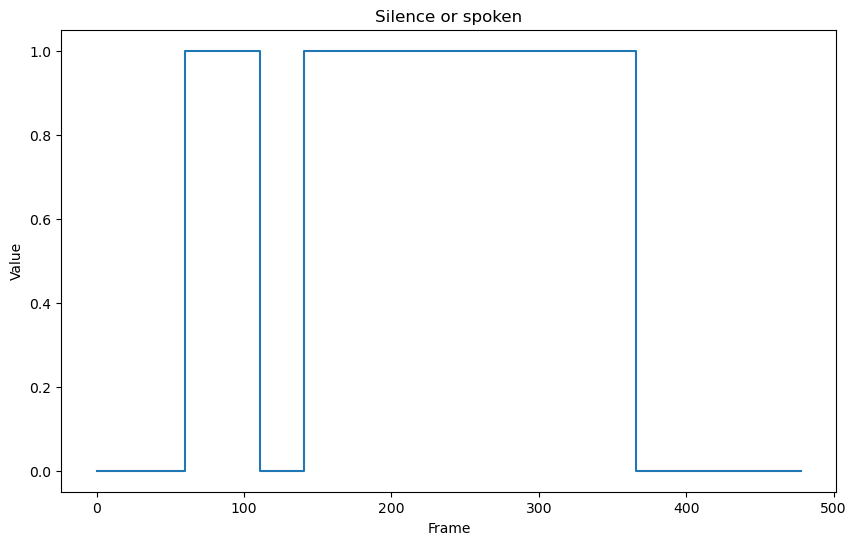

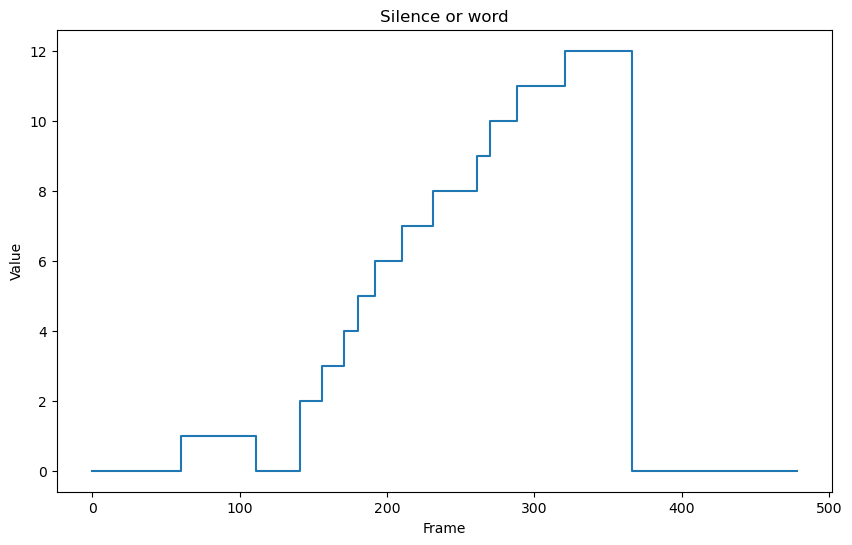

In [9]:
# First we load the analysis file in the dps.SpeechAnalysis() class
speech_recognition = dps.SpeechAnalysis(analysis_files[0])

# This will have already parsed the data into a raw curve which can be visualized:
speech_recognition.display_raw_curve(0)
speech_recognition.display_raw_curve(1)

Note that each feature has a number of different parameters. You can extract as many features as you wish, with varying different parameters.

Now we can extract features like dps as follows:

In [ ]:
# Get the dps across a region:
print(speech_recognition.get_dps())
print(speech_recognition.get_dps(region = {"start_ms" : 0, "end_ms" : 92000}))
print(speech_recognition.get_dps(region = {"start_ms" : 0, "end_ms" : 40000}))
print(speech_recognition.get_dps(region = {"start_ms" : 40000, "end_ms" : 92000}))

# Get DPS as a feature curve:
dps_curve = speech_recognition.get_dps_feature_curve(128, 4)
# Visualize:
plt.figure(figsize=(10, 6))
frame_numbers = np.arange(len(dps_curve))
plt.plot(frame_numbers, dps_curve, drawstyle='steps-post')
plt.xlabel('Frame')
plt.ylabel('DPS')
plt.title('DPS Curve')
plt.show()